In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm


In [2]:
data=pd.read_excel('dem1.xlsx',engine='openpyxl')
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)

In [3]:
data.to_csv('DATAdem1.csv',index=False)
data.head()

,N TL,Évolution et Structure de la Population 1999.COM,Évolution et Structure de la Population 1999.Région,Évolution et Structure de la Population 1999.Département,Évolution et Structure de la Population 1999.Libellé géographique,Population en 1999 (princ),Pop 0-14 ans en 1999 (princ),Pop 15-29 ans en 1999 (princ),Pop 30-44 ans en 1999 (princ),Pop 45-59 ans en 1999 (princ),...,C20_POP55P,C20_POP55P_CS1,C20_POP55P_CS2,C20_POP55P_CS3,C20_POP55P_CS4,C20_POP55P_CS5,C20_POP55P_CS6,C20_POP55P_CS7,C20_POP55P_CS8,NTLBIN
0,0,16001,54,16,Abzac,539,95,88,107,92,...,276,10,5,0,5,5,15,201,35,0
1,0,16002,54,16,Les Adjots,392,43,68,68,79,...,205,0,24,0,5,15,20,112,29,0
2,0,16003,54,16,Agris,711,118,114,160,143,...,243,0,20,5,0,5,15,182,15,0
3,0,16005,54,16,Aigre,1135,148,152,190,188,...,862,0,15,10,35,30,45,684,43,0
4,0,16007,54,16,Alloue,528,67,77,101,84,...,252,5,10,0,20,15,10,172,20,0


In [4]:
data=data.drop('N TL',axis=1)

In [5]:
data=data.drop('C20_POP1524_CS7',axis=1)

In [6]:
columns_to_drop = data.filter(regex="^REG|^DEP|^LIBGEO|^Évolution").columns
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,Population en 1999 (princ),Pop 0-14 ans en 1999 (princ),Pop 15-29 ans en 1999 (princ),Pop 30-44 ans en 1999 (princ),Pop 45-59 ans en 1999 (princ),Pop 60-74 ans en 1999 (princ),Pop 75 ans ou plus en 1999 (princ),Pop 15 ans ou plus en 1999 (compl),Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl),"Pop 15 ans ou plus Artisans, Comm, Chefs entr en 1999 (compl)",...,C20_POP55P,C20_POP55P_CS1,C20_POP55P_CS2,C20_POP55P_CS3,C20_POP55P_CS4,C20_POP55P_CS5,C20_POP55P_CS6,C20_POP55P_CS7,C20_POP55P_CS8,NTLBIN
0,539,95,88,107,92,88,69,464,40,24,...,276,10,5,0,5,5,15,201,35,0
1,392,43,68,68,79,87,47,372,12,12,...,205,0,24,0,5,15,20,112,29,0
2,711,118,114,160,143,133,43,584,8,28,...,243,0,20,5,0,5,15,182,15,0
3,1135,148,152,190,188,230,227,1000,4,40,...,862,0,15,10,35,30,45,684,43,0
4,528,67,77,101,84,138,61,456,56,8,...,252,5,10,0,20,15,10,172,20,0


In [8]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
Population en 1999 (princ)       0.347760
Pop 0-14 ans en 1999 (princ)     0.367407
Pop 15-29 ans en 1999 (princ)    0.289234
Pop 30-44 ans en 1999 (princ)    0.351314
Pop 45-59 ans en 1999 (princ)    0.359749
                                   ...   
C20_POP55P_CS5                   0.388275
C20_POP55P_CS6                   0.401961
C20_POP55P_CS7                   0.398144
C20_POP55P_CS8                   0.387165
NTLBIN                           1.000000
Name: NTLBIN, Length: 203, dtype: float64


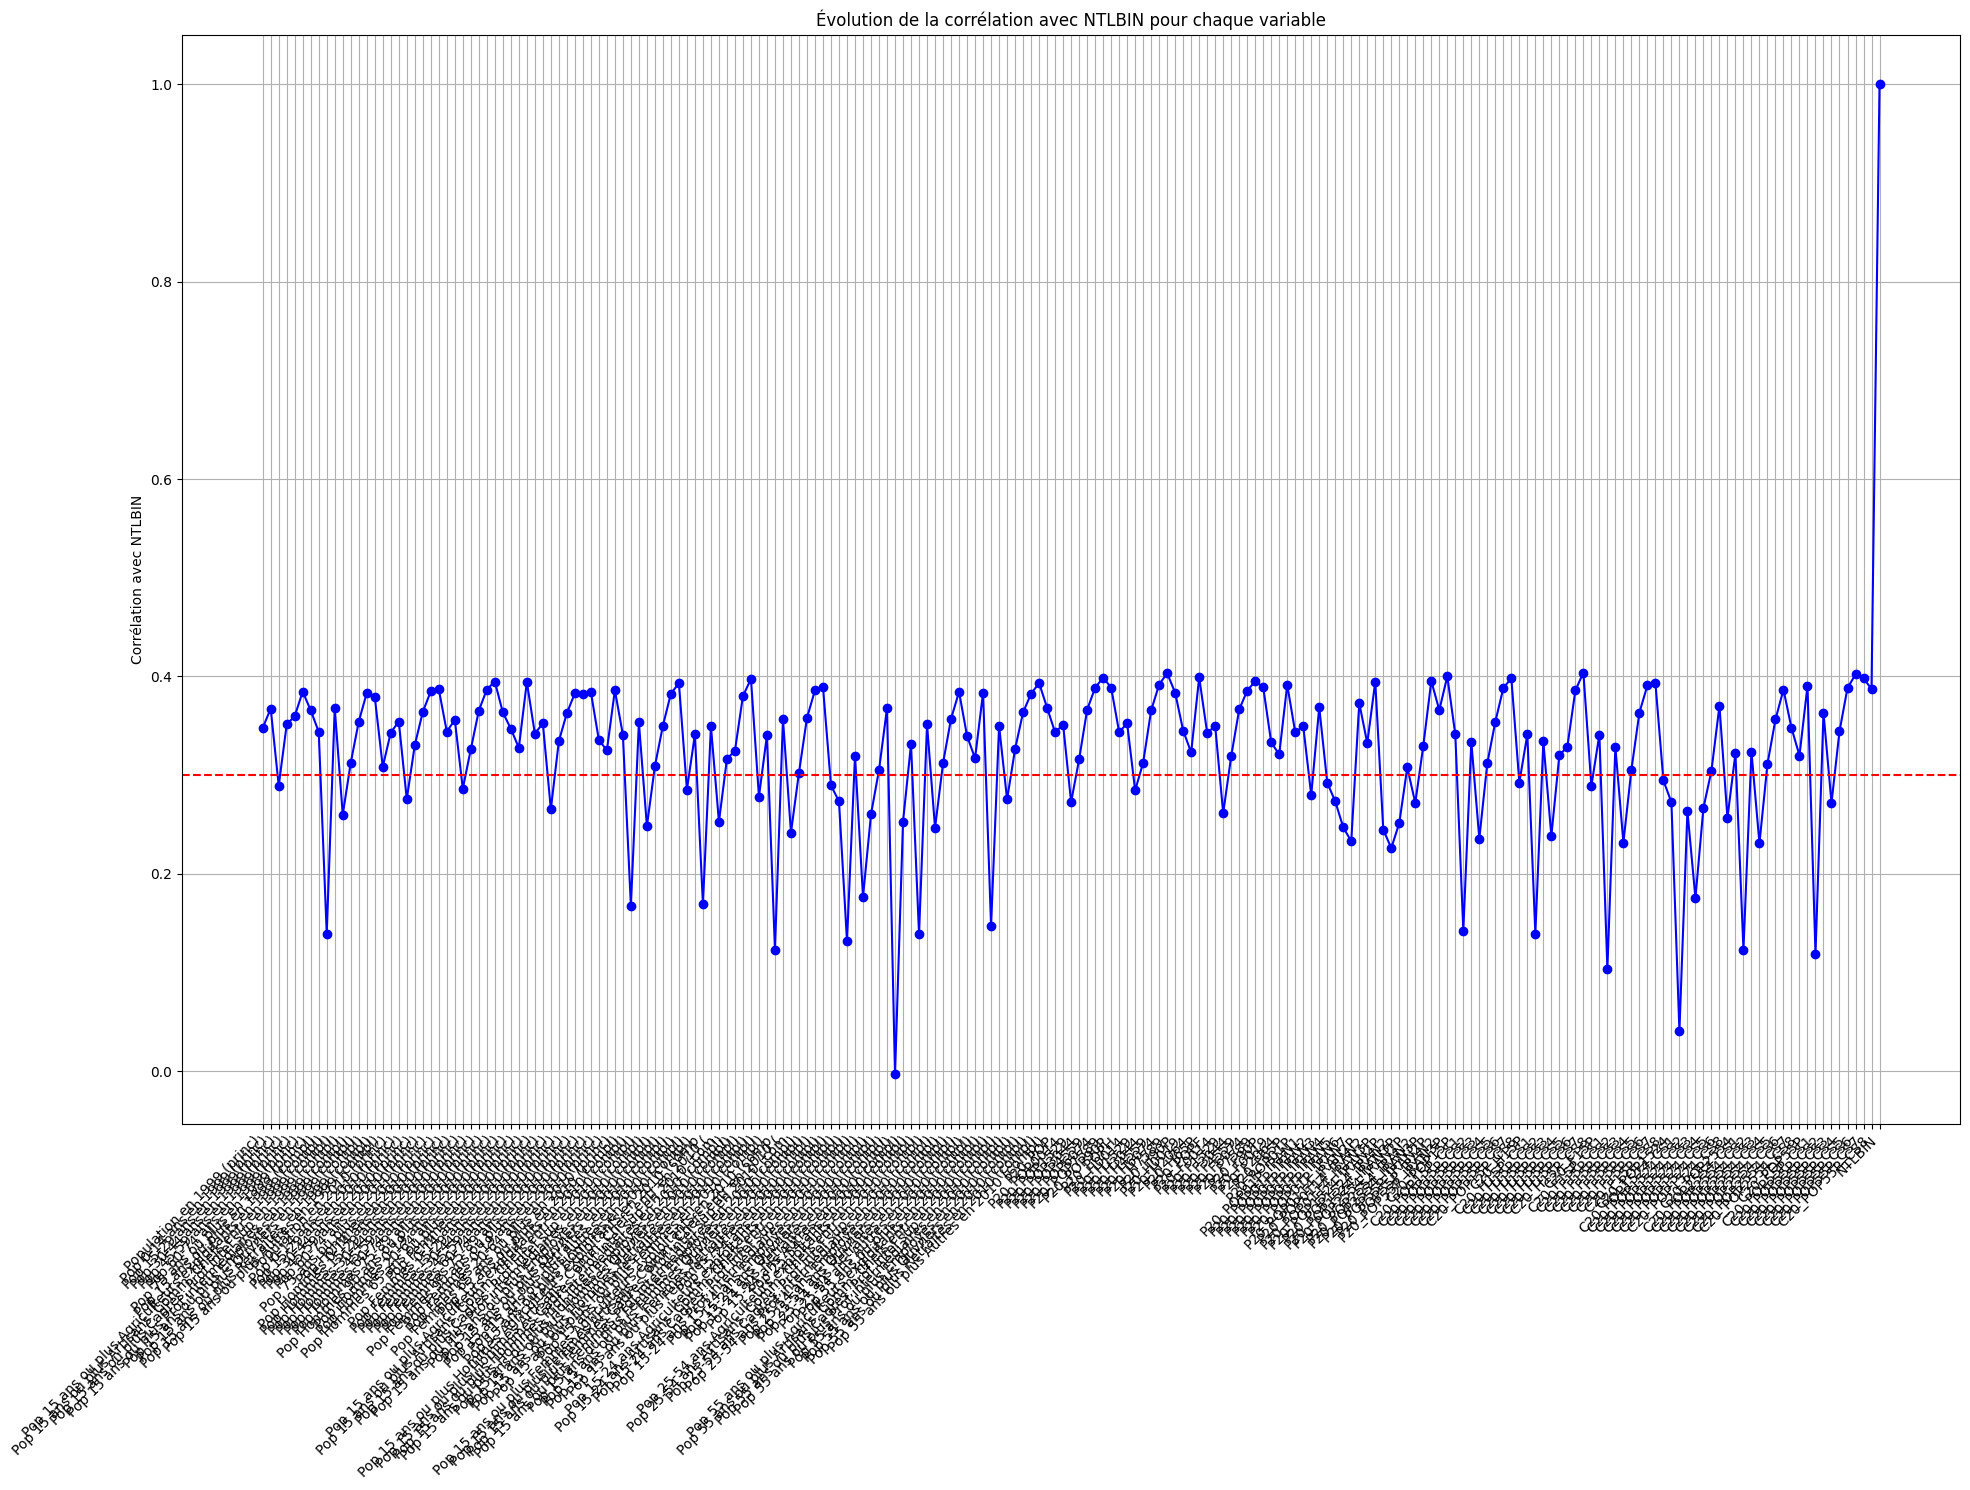

In [9]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé
high_vif_threshold = 10

# Boucle pour supprimer les variables avec un VIF élevé
while vif_data['VIF'].max() > high_vif_threshold and X.shape[1] > 100:
    # Trouver les 10 variables avec les VIF les plus élevés
    max_vif_variables = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[:5].tolist()
    print(f'Suppression des variables avec les VIF les plus élevés: {max_vif_variables}')
    
    # Supprimer ces variables de X
    X = X.drop(columns=max_vif_variables)
    
    # Recalculer les VIF
    vif_data = calculate_vif(X)
    print(vif_data)

# Si le nombre de variables restantes est <= 100, supprimer une par une
if X.shape[1] <= 100:
    while vif_data['VIF'].max() > high_vif_threshold:
        max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
        print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
        X = X.drop(columns=[max_vif_variable])
        vif_data = calculate_vif(X)
        print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF initiaux:
                          Variable           VIF
0       Population en 1999 (princ)           inf
1     Pop 0-14 ans en 1999 (princ)           inf
2    Pop 15-29 ans en 1999 (princ)           inf
3    Pop 30-44 ans en 1999 (princ)           inf
4    Pop 45-59 ans en 1999 (princ)           inf
..                             ...           ...
197                 C20_POP55P_CS4  1.115068e+05
198                 C20_POP55P_CS5  1.307053e+05
199                 C20_POP55P_CS6  3.772781e+04
200                 C20_POP55P_CS7  8.178858e+07
201                 C20_POP55P_CS8  1.960149e+05

[202 rows x 2 columns]
Suppression des variables avec les VIF les plus élevés: ['Population en 1999 (princ)', 'Pop 15 ans ou plus Artisans, Comm, Chefs entr en 1999 (compl)', 'Pop 0-14 ans en 1999 (princ)', 'Pop 15 ans ou plus Autres en 1999 (compl)', 'Pop 15 ans ou plus Retraités  en 1999 (compl)']
                               Variable           VIF
0         Pop 15-29 ans en 1999 (princ)  7

In [27]:
print(X.columns)

Index(['Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)',
       'Pop Hommes 90 ans ou plus en 2010 (princ)',
       'Pop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp',
       'Pop 15 ans ou plus Femmes Agriculteurs exploitants en 2010 (comp',
       'Pop 15-24 ans Agriculteurs exploitants en 2010 (compl)',
       'Pop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)',
       'Pop 15-24 ans Retraités en 2010 (compl)',
       'Pop 25-54 ans Retraités en 2010 (compl)',
       'Pop 55 ans ou plus Agriculteurs exploitants en 2010 (compl)',
       'P20_POP01P_IRAN3', 'P20_POP01P_IRAN6', 'P20_POP55P_IRAN3P',
       'C20_F15P_CS1', 'C20_POP1524_CS1', 'C20_POP1524_CS2', 'C20_POP2554_CS1',
       'C20_POP2554_CS7', 'C20_POP55P_CS1'],
      dtype='object')


In [8]:
colonnes=['Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)',
       'Pop Hommes 90 ans ou plus en 2010 (princ)',
       'Pop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp',
       'Pop 15 ans ou plus Femmes Agriculteurs exploitants en 2010 (comp',
       'Pop 15-24 ans Agriculteurs exploitants en 2010 (compl)',
       'Pop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)',
       'Pop 15-24 ans Retraités en 2010 (compl)',
       'Pop 25-54 ans Retraités en 2010 (compl)',
       'Pop 55 ans ou plus Agriculteurs exploitants en 2010 (compl)',
       'P20_POP01P_IRAN3', 'P20_POP01P_IRAN6', 'P20_POP55P_IRAN3P',
       'C20_F15P_CS1', 'C20_POP1524_CS1', 'C20_POP1524_CS2', 'C20_POP2554_CS1',
       'C20_POP2554_CS7', 'C20_POP55P_CS1']
#for txt in X.columns:
    #colonnes.append(txt)


X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

''''Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)',
       'Pop Hommes 90 ans ou plus en 2010 (princ)',
       'Pop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp',
       'Pop 15 ans ou plus Femmes Agriculteurs exploitants en 2010 (comp',
       'Pop 15-24 ans Agriculteurs exploitants en 2010 (compl)',
       'Pop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)',
       'Pop 15-24 ans Retraités en 2010 (compl)',
       'Pop 25-54 ans Retraités en 2010 (compl)',
       'Pop 55 ans ou plus Agriculteurs exploitants en 2010 (compl)',
       'P20_POP01P_IRAN3', 'P20_POP01P_IRAN6', 'P20_POP55P_IRAN3P',
       'C20_F15P_CS1', 'C20_POP1524_CS1', 'C20_POP1524_CS2', 'C20_POP2554_CS1',
       'C20_POP2554_CS7', 'C20_POP55P_CS1' '''

         Current function value: 0.321484
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4304
Model:                          Logit   Df Residuals:                     4286
Method:                           MLE   Df Model:                           17
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                 -0.7429
Time:                        16:27:55   Log-Likelihood:                -1383.7
converged:                      False   LL-Null:                       -793.90
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Pop 15 ans ou plus Agriculteurs expl

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


"'Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)',\n       'Pop Hommes 90 ans ou plus en 2010 (princ)',\n       'Pop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp',\n       'Pop 15 ans ou plus Femmes Agriculteurs exploitants en 2010 (comp',\n       'Pop 15-24 ans Agriculteurs exploitants en 2010 (compl)',\n       'Pop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)',\n       'Pop 15-24 ans Retraités en 2010 (compl)',\n       'Pop 25-54 ans Retraités en 2010 (compl)',\n       'Pop 55 ans ou plus Agriculteurs exploitants en 2010 (compl)',\n       'P20_POP01P_IRAN3', 'P20_POP01P_IRAN6', 'P20_POP55P_IRAN3P',\n       'C20_F15P_CS1', 'C20_POP1524_CS1', 'C20_POP1524_CS2', 'C20_POP2554_CS1',\n       'C20_POP2554_CS7', 'C20_POP55P_CS1' "

In [10]:
for i in range (len(result.pvalues.index)) : 
    if result.pvalues[i] >=0.05 :
        colonnes.remove(result.pvalues.index[i])

C:\Users\mohci\AppData\Local\Temp\ipykernel_17248\2681166170.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if result.pvalues[i] >=0.05 :


In [11]:
X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())


'''"Métadonnées v8.pdf"Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)         -0.0922      0.006    -15.758      0.000      -0.104      -0.081
Pop Hommes 90 ans ou plus en 2010 (princ)                            0.0579      0.014      4.194      0.000       0.031       0.085
Pop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp    -0.0362      0.009     -4.069      0.000      -0.054      -0.019
Pop 15-24 ans Agriculteurs exploitants en 2010 (compl)               0.2044      0.040      5.150      0.000       0.127       0.282
Pop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)             0.1027      0.022      4.609      0.000       0.059       0.146
P20_POP01P_IRAN3                                                    -0.0018      0.001     -3.047      0.002      -0.003      -0.001
P20_POP55P_IRAN3P                                                    0.0063      0.003      2.347      0.019       0.001       0.012
C20_POP2554_CS1                                                     -0.0393      0.009     -4.391      0.000      -0.057      -0.022
C20_POP55P_CS1'''

Optimization terminated successfully.
         Current function value: 0.322700
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4304
Model:                          Logit   Df Residuals:                     4295
Method:                           MLE   Df Model:                            8
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                 -0.7495
Time:                        16:28:20   Log-Likelihood:                -1388.9
converged:                       True   LL-Null:                       -793.90
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------


'"Métadonnées v8.pdf"Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)         -0.0922      0.006    -15.758      0.000      -0.104      -0.081\nPop Hommes 90 ans ou plus en 2010 (princ)                            0.0579      0.014      4.194      0.000       0.031       0.085\nPop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp    -0.0362      0.009     -4.069      0.000      -0.054      -0.019\nPop 15-24 ans Agriculteurs exploitants en 2010 (compl)               0.2044      0.040      5.150      0.000       0.127       0.282\nPop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)             0.1027      0.022      4.609      0.000       0.059       0.146\nP20_POP01P_IRAN3                                                    -0.0018      0.001     -3.047      0.002      -0.003      -0.001\nP20_POP55P_IRAN3P                                                    0.0063      0.003      2.347      0.019       0.001       0.012\nC20_POP2554_CS1                          

In [14]:
result.pvalues.index

Index(['Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)',
       'Pop Hommes 90 ans ou plus en 2010 (princ)',
       'Pop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp',
       'Pop 15-24 ans Agriculteurs exploitants en 2010 (compl)',
       'Pop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)',
       'P20_POP01P_IRAN3', 'P20_POP55P_IRAN3P', 'C20_POP2554_CS1',
       'C20_POP55P_CS1'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[814   3]
 [ 37   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       817
           1       0.70      0.16      0.26        44

    accuracy                           0.95       861
   macro avg       0.83      0.58      0.62       861
weighted avg       0.94      0.95      0.94       861


Accuracy Score:
0.9535423925667829


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


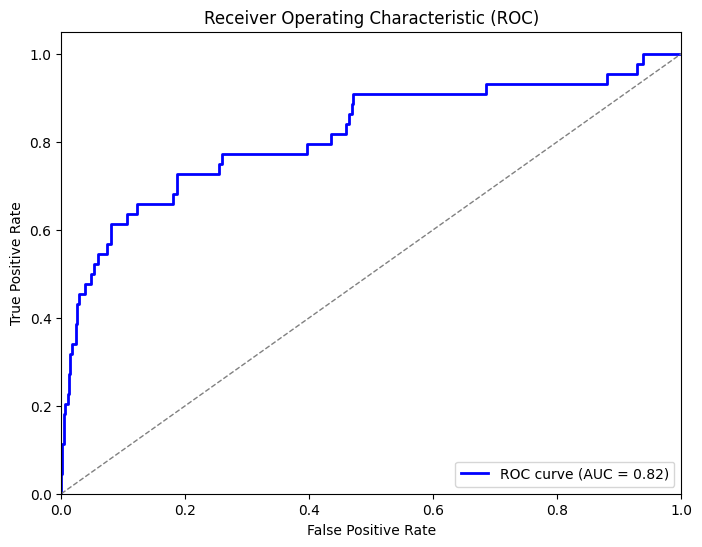

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()